<a href="https://colab.research.google.com/github/IamMarcIvanov/DroughtStudiesProject/blob/master/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.random.seed(7)

In [ ]:
dataset = pd.read_csv('rain_Point_1.csv',index_col = 0, parse_dates= True)

In [ ]:
dataset.drop(columns= ['LONGITUDE', 'LATITUDE'], inplace= True)

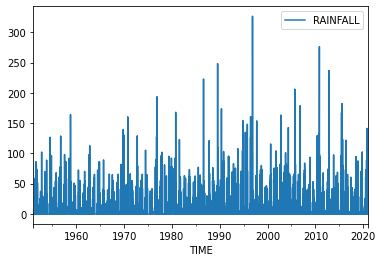

In [ ]:
dataset.plot()

In [ ]:
dataset.fillna(method= 'ffill', inplace= True)

In [ ]:
train = dataset[dataset.index < '2015-01-01']
test = dataset[dataset.index > '2015-01-01']

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
train = dataset[:23377]
test = dataset[23377:]

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
X_train, y_train = create_dataset(train, look_back= 1)

In [ ]:
X_test, y_test = create_dataset(test, look_back= 1)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
look_back = 1

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(6, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
23375/23375 - 24s - loss: 0.0012
Epoch 2/100
23375/23375 - 22s - loss: 0.0012
Epoch 3/100
23375/23375 - 22s - loss: 0.0012
Epoch 4/100
23375/23375 - 22s - loss: 0.0012
Epoch 5/100
23375/23375 - 22s - loss: 0.0012
Epoch 6/100
23375/23375 - 22s - loss: 0.0012
Epoch 7/100
23375/23375 - 22s - loss: 0.0012
Epoch 8/100
23375/23375 - 22s - loss: 0.0012
Epoch 9/100
23375/23375 - 22s - loss: 0.0012
Epoch 10/100
23375/23375 - 22s - loss: 0.0012
Epoch 11/100
23375/23375 - 22s - loss: 0.0012
Epoch 12/100
23375/23375 - 22s - loss: 0.0012
Epoch 13/100
23375/23375 - 22s - loss: 0.0012
Epoch 14/100
23375/23375 - 22s - loss: 0.0012
Epoch 15/100
23375/23375 - 22s - loss: 0.0012
Epoch 16/100
23375/23375 - 22s - loss: 0.0012
Epoch 17/100
23375/23375 - 22s - loss: 0.0012
Epoch 18/100
23375/23375 - 22s - loss: 0.0012
Epoch 19/100
23375/23375 - 22s - loss: 0.0012
Epoch 20/100
23375/23375 - 22s - loss: 0.0012
Epoch 21/100
23375/23375 - 22s - loss: 0.0012
Epoch 22/100
23375/23375 - 22s - loss: 0.00

In [ ]:

# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

In [ ]:
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainScorer2 = r2_score(y_train[0], trainPredict[:,0])
print('Train Score: %.4f R2' % (trainScorer2))
testScorer2 = r2_score(y_test[0], testPredict[:,0])
print('Test Score: %.4f R2' % (testScorer2))

Train Score: 11.04 RMSE
Test Score: 12.99 RMSE
Train Score: 0.1455 R2
Test Score: 0.1486 R2


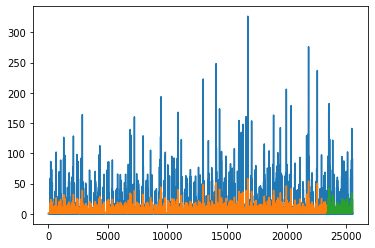

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()